In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('/content/netflix_titles.csv')

# First look at the data
print(df.shape)    # How many rows and columns
print(df.columns)  # Column names
df.head()          # Show top 5 rows

(8807, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Check for null values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [5]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
# Handling missing values
# Fill missing director names with 'Unknown'
df['director'].fillna('Unknown', inplace=True)

# Fill missing country with 'Unknown'
df['country'].fillna('Unknown', inplace=True)

# Drop rows with missing date_added, if necessary
df.dropna(subset=['date_added'], inplace=True)

<ipython-input-10-ca221c06e027>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-10-ca221c06e027>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [12]:
# Cleaning and converting date_added
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

<ipython-input-13-0f5dfb86c687>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_counts.index, y=content_counts.values, palette='Set2')


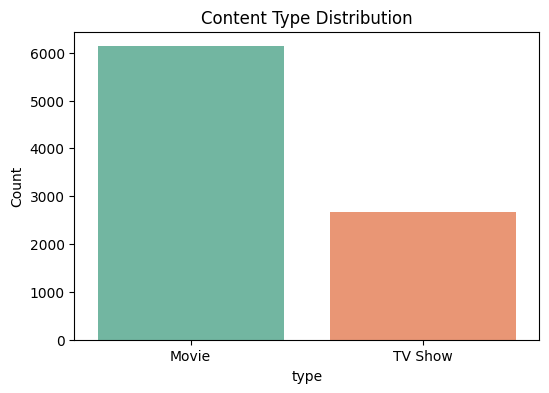

In [13]:
# Type of content on the netflix (Movies or TV shows)
content_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=content_counts.index, y=content_counts.values, palette='Set2')
plt.title('Content Type Distribution')
plt.ylabel('Count')
plt.show()

<ipython-input-14-eba4c5a0ed47>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')


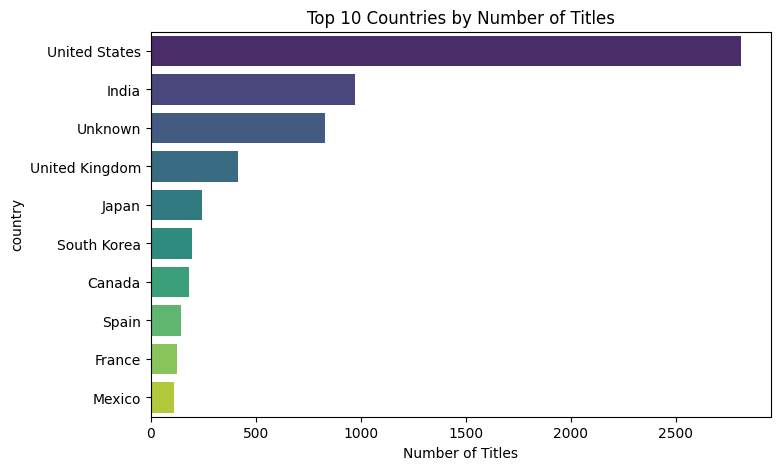

In [14]:
# Which country produces the most Netflix content
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.show()

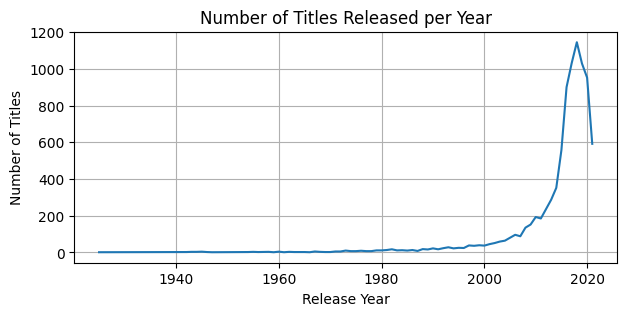

In [16]:
# How has Netflix content grown over the years
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(7,3))
plt.title('Number of Titles Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

<ipython-input-17-e6b1a3e42009>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index[:10], palette='muted')


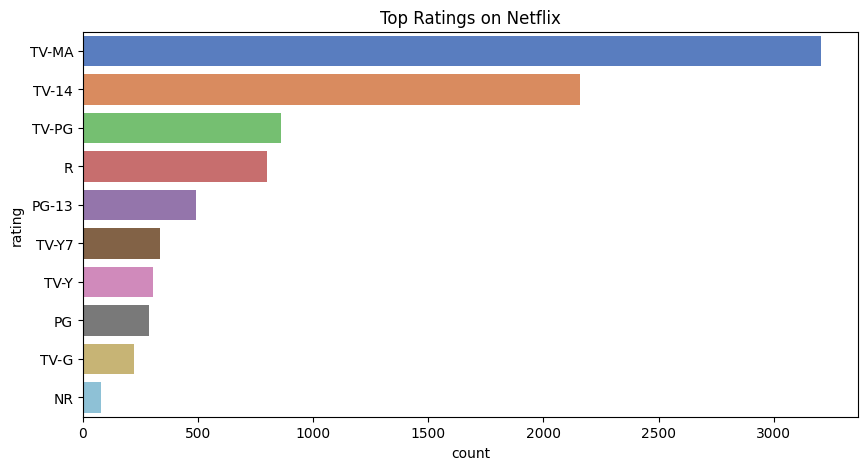

In [17]:
# What are the most common ratings?
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index[:10], palette='muted')
plt.title('Top Ratings on Netflix')
plt.show()

<ipython-input-18-b32e410341bb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), palette='pastel')


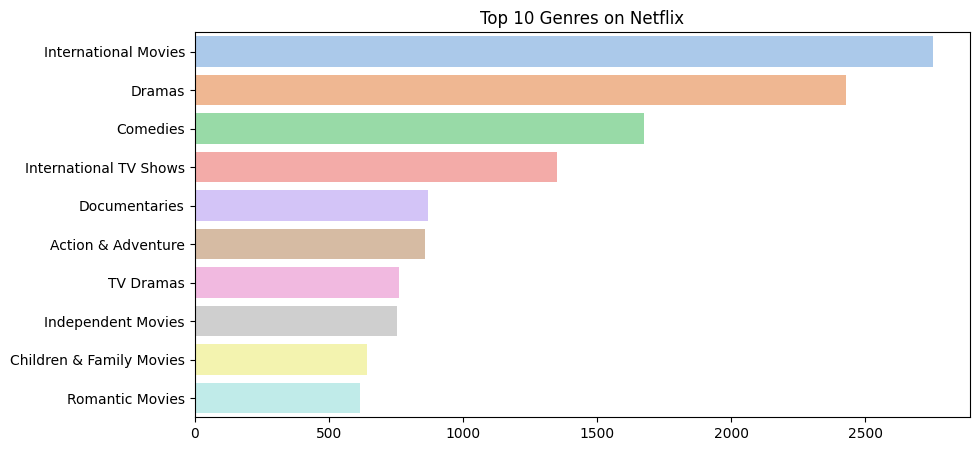

In [18]:
# What are the most common genres

# Split the genres
from collections import Counter
genres = ','.join(df['listed_in']).split(',')
genre_count = Counter([genre.strip() for genre in genres])

# Top 10 genres
top_genres = dict(genre_count.most_common(10))
plt.figure(figsize=(10,5))
sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), palette='pastel')
plt.title('Top 10 Genres on Netflix')
plt.show()

In [20]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['content_age'] = 2025 - df['release_year']

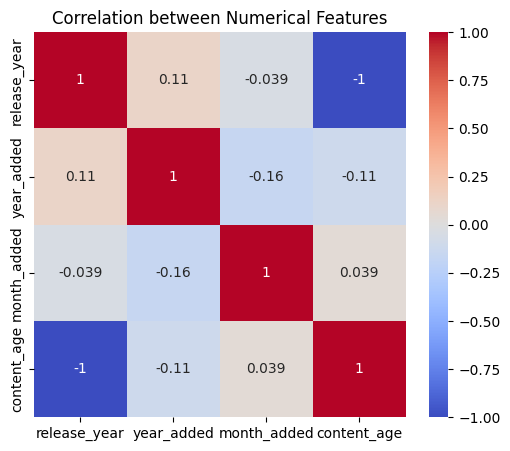

In [24]:
# Correlation Heatmap
numeric_cols = ['release_year', 'year_added', 'month_added', 'content_age']
plt.figure(figsize=(6,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Features')
plt.show()